In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Initial Area

We want the initial area to be the end of Fay's Gravity-inertial phase.

From Dodge(1983):

$A_0 = \pi \frac{{K_2}^4}{{K_1}^2}\left(\frac{g \cdot \Delta \rho \cdot V_0^5 }{\nu_w^2}\right)^{1/6}$

with:

$K_1 = 1.53$ (inertial phase constant)

$K_2 = 1.21$ (viscous phase constant)

We can combine the various constants, and get:

$A_0 = C_{ia} \cdot {\Delta \rho}^6 \cdot V_0^{5/6}$

$C_{ia} = \pi \frac{{K_2}^4}{{K_1}^2} \left(\frac{g}{\nu_w^2}\right)^{1/6} \approx 42.09$


In [2]:
# a few utilities and constants

# Constants
## These came from Dodge(1983) -- slightly different than Fay (1971)
## Fay(1971) has 1.45 for viscous, and 1.14 for gravity
## but the Dodge numbers are derived from experiments, so what the heck

K1=1.53 # Intertial phase
K2=1.21 # Viscous phase

visc_w = 1e-6 # viscosity of water: m^2/s

g = 9.806 # gravity, m/s^2

rho_water = 1025.0 # kg/m^3 (typical seawater)

rho_oil = 900 # kg/m^3 -- arbitrary number

# Combining the contants for the initial area:
C_ia = np.pi * (K2**4 / K1**2) * (g / visc_w**2)**(1.0/6.0)

print("initial area constant:", C_ia)

def Delta(rho_oil):
    """difference between oil and seawater density"""
    return (float(rho_water) - rho_oil) / rho_water

def init_area(V0, rho_oil):
    """
    initial area -- end of Fay gravity-inertial
    """
    return np.pi * (K2**4 / K1**2) * (g * Delta(rho_oil) * V0**5 / visc_w**2 )**(1./6.) 

def init_area2(V0, rho_oil):
    """
    initial area -- end of Fay gravity-inertial with constants combined
    """
    return C_ia * Delta(rho_oil)**(1.0/6.0) * V0**(5.0/6.0) 

def init_radius(V0, rho_oil):
    """
    initial radius -- end of Fay gravity-inertial
    """
    return  (K2**2/K1) * ((g * V0**5 * delta())/visc_w**2 )**(1./12.) 

def min_thickness(visc_oil):
    if visc_oil <= 1e-6:
        return 1e-5    
    elif visc_oil >= 1e-4:
        return 1e-4
    else:
        return 1e-5 + (90.0 / 99.0) * (visc_oil - 1e-6)

def max_area(volume, visc_oil):
    return volume / min_thickness(visc_oil)

def Fay_gv(V0, rho_oil, t):
    """
    Fay Gravity-viscous phase analytical solution
    """
    return np.pi * K1**2 * (Delta(rho_oil) * g / np.sqrt(visc_w))**(1./3.) * V0**(2./3.) * np.sqrt(t)

## dont need these anymore:
# def bill_area2(V0, rho_oil):
#     """ from Jan 2017 spreading doc
#         this constant is wrong, but I can see where it came from. the actual value is:
#         420.87 -- so off by a factor of 100 (units?)
#     """
#     return 4.2 * (Delta(rho_oil) * V0**5)**(1.0 / 6.0)
    
# def bill_radius2(V0, rho_oil):
#     np.sqrt(bill_area2(V0, rho_oil) / np.pi)

# def bill_area1(V0, rho_oil):
#     """ from May 2016 spreading doc
#         wrong constant -- no idea where it came from
#     """
#     return 16 * ((Delta(rho_oil) * g * V0**5) / visc_w**2)**(1.0 / 6.0)

    

initial area constant: 420.878887157864


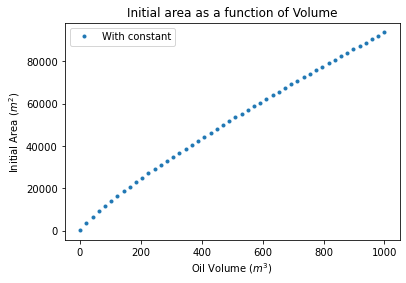

In [3]:
# plot initial area
V0 = np.linspace(1,1000) # volume in m^3
fig, ax = plt.subplots()
ax.plot(V0, init_area2(V0, rho_oil), ".", label="With constant")
#ax.set_xlim(1e-7, 1e-3)
#ax.set_ylim(0, 110)
ax.set_title("Initial area as a function of Volume")
ax.set_xlabel("Oil Volume ($m^3$)")
ax.set_ylabel("Initial Area ($m^2$)")
ax.legend(loc='upper left')

/var/folders/7t/137hx7xn4s1fdqvjj1bhtdhrz84cy3/T/ipykernel_77378/965891686.py:38: RuntimeWarning: invalid value encountered in power
  return C_ia * Delta(rho_oil)**(1.0/6.0) * V0**(5.0/6.0)


Text(0, 0.5, 'Initial Area ($m^2$)')

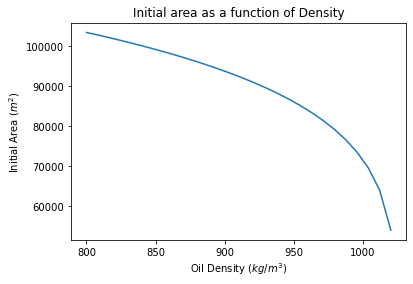

In [4]:
# plot initial area as a function of oil density
# V0 = np.linspace(1000) # volume in m^3
V0 = 1000 # volume in m^3
rho_oil = np.linspace(800, 1200) # density in kg/m^3
fig, ax = plt.subplots()
ax.plot(rho_oil, init_area2(V0, rho_oil))
#ax.set_xlim(1e-7, 1e-3)
#ax.set_ylim(0, 110)
ax.set_title("Initial area as a function of Density")
ax.set_xlabel("Oil Density ($kg/m^3$)")
ax.set_ylabel("Initial Area ($m^2$)")
# ax.legend(loc='upper right')

## Intial area -- matching Inertial and Viscous phases

from Fay (1971):

$r_i = K_i (\Delta g V t^2)^{1/4}$

$r_v = K_v ( \frac{ \Delta g V t^{3/2}}{\nu_w^{1/2}})^{1/6}$

where:

$ K_i=1.14 $

$ K_v=1.45 $



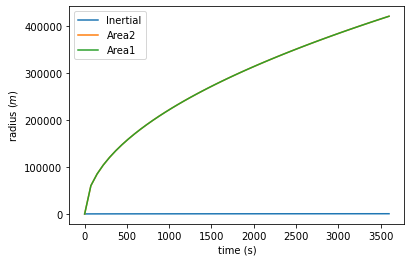

In [18]:
K_i = 1.14
K_v = 1.45

def r_i(Vol, rho_oil, t):
    """radius of Fay inertial phase"""
    return K_i * (Delta(rho_oil) * g * Vol * t**2)**(0.25)

def r_v(Vol, rho_oil, t):
    """radius of Fay viscous phase"""
    #return K_v * (Delta(rho_oil) * g * Vol**2 * t**1.5 / np.sqrt(visc_w))**(1.0 / 6.0)
    return K_v * (Delta(rho_oil) * g / np.sqrt(visc_w))**(1./6.) * Vol**(1./3.) * t**0.25

def a_v(Vol, rho_oil, t):
    """area of Fay viscous phase: pi r^2"""
    return np.pi * r_v(Vol, rho_oil, t)**2

def Fay_gv(V0, rho_oil, t):
    """
    Fay Gravity-viscous phase analytical solution
    """
    return np.pi * K_v**2 * (Delta(rho_oil) * g / np.sqrt(visc_w))**(1./3.) * V0**(2./3.) * np.sqrt(t)


rho_oil = 900
Vol = 1000
t = np.linspace(0, 3600*1)

fig, ax = plt.subplots()
#ax.plot(t, r_i(Vol, rho_oil, t), label="Inertial")
ax.plot(t, a_v(Vol, rho_oil, t), label="Area2")
# ax.plot(t, a_v3(Vol, rho_oil, t), '.',label="Area3")
ax.plot(t, Fay_gv(Vol, rho_oil, t), label="Area1")

#ax.set_xlim(1e-7, 1e-3)
#ax.set_ylim(0, 110)
ax.set_xlabel("time (s)")
ax.set_ylabel("radius ($m$)")
ax.legend(loc='upper left')


## Fay -- matching rate of change of radius

Where does viscous take over?

Hmm -- this looks like the viscous phase starts stronger, then inertial pahse takes over -- backwards??

/var/folders/7t/137hx7xn4s1fdqvjj1bhtdhrz84cy3/T/ipykernel_77378/1519208996.py:8: RuntimeWarning: divide by zero encountered in power
  return C_i * t**(-0.5)
/var/folders/7t/137hx7xn4s1fdqvjj1bhtdhrz84cy3/T/ipykernel_77378/1519208996.py:11: RuntimeWarning: divide by zero encountered in power
  return C_v * t**(-.75)


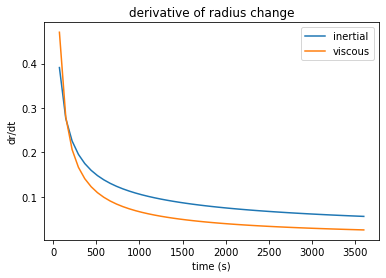

In [6]:
K_i = 1.14
K_v = 1.45

C_i = 0.5 * K_i * (Delta(rho_oil) * g * Vol)**0.25
C_v = 0.25 * K_v * (Delta(rho_oil) * g * Vol**2 / np.sqrt(visc_w))**(1.0/6.0)

def drdt_i(t):
    return C_i * t**(-0.5)

def drdt_v(t):
    return C_v * t**(-.75)

fig, ax = plt.subplots()
ax.plot(t, drdt_i(t), label="inertial")
ax.plot(t, drdt_v(t), label="viscous")

ax.set_title("derivative of radius change")
#ax.set_xlim(1e-7, 1e-3)
#ax.set_ylim(0, 110)
ax.set_xlabel("time (s)")
ax.set_ylabel("dr/dt")
ax.legend()

In [7]:
# Simple Euler method integration for area as a function of area
def Euler(f, T, A_0):
    dt = T[1] - T[0] # assume it's the same...
    A = [A_0]
    for t in enumerate(T[1:]):
        A.append(A[-1] + f(A[-1]) * dt)
    return np.array(A)



Text(0, 0.5, 'Terminal thickness ($\\mu m$)')

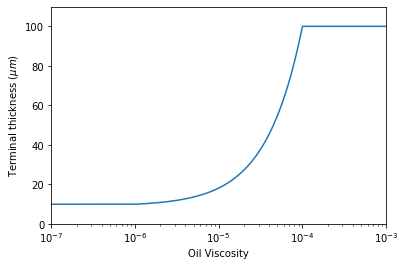

In [8]:
# plot thickness computation
nu_oil = np.logspace(-7,-3, 1000)
fig, ax = plt.subplots()
delta = np.array([min_thickness(nu) for nu in nu_oil])
#ax.plot(nu_oil, delta * 1e-6)
ax.semilogx(nu_oil, delta * 1e6)
ax.set_xlim(1e-7, 1e-3)
ax.set_ylim(0, 110)
ax.set_xlabel("Oil Viscosity")
ax.set_ylabel("Terminal thickness ($\mu m$)")

In [9]:
half = (1e-4 - 1e-6) / 2.0 + 1e-6
for nu in [9.999e-7, 1e-6, 1.0000001e-6, 1e-5, half, 9.9999999e-5, 1e-4, 1.1e-4]:
    d = min_thickness(nu)
    print("nu: %.8e, delta: %.8e"%(nu, d))

nu: 9.99900000e-07, delta: 1.00000000e-05
nu: 1.00000000e-06, delta: 1.00000000e-05
nu: 1.00000010e-06, delta: 1.00000001e-05
nu: 1.00000000e-05, delta: 1.81818182e-05
nu: 5.05000000e-05, delta: 5.50000000e-05
nu: 9.99999990e-05, delta: 9.99999991e-05
nu: 1.00000000e-04, delta: 1.00000000e-04
nu: 1.10000000e-04, delta: 1.00000000e-04



# Fay converted to a function of area

## Original Fay Spreading (Gravity-viscous)

$A(t) = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2 \cdot t^{3/2}}{\nu_w^{1/2}})$



## First the math/numerics  without real numbers:

$ C = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2}{\nu_w^{1/2}})^{1/3}$

$A = C t^{1/2}$

$ \frac{dA}{dt} = \frac{1}{2}C t^{-1/2} $

$ \frac{dA}{dt} = \frac{1}{2} \frac{C^2}{A} $

Text(0, 0.5, 'Area')

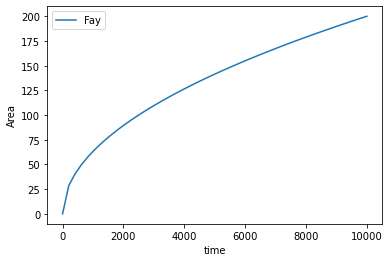

In [10]:
# as a function of time:
C = 2 # shouldn't be 1! more likely to find errors this way!
T = np.linspace(0, 10000)
A1 = C * np.sqrt(T)

fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")


Text(0, 0.5, 'Area')

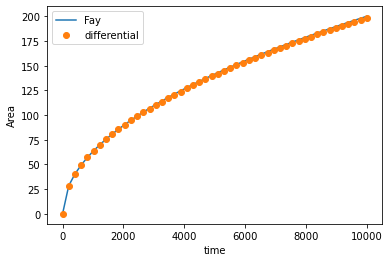

In [11]:
# as a differential equation:
def dadt(t):
    return 0.5 * C / np.sqrt(t)

# simple Euler method:
start = 10 # initilize with Fay
A2 = np.zeros_like(T)
A2[:start] = A1[:start]
dt = T[1] - T[0] # assume it's the same...
for i, t in enumerate(T[start:]):
    i += start
    A2[i] = A2[i-1] + dadt(t)*dt    
    
fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.plot(T, A2, 'o', label="differential")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")


Note how the solutions sit right on top of each-other if you initialize right and use small enough time steps.

**NOTE:** maybe try RK method?

Text(0, 0.5, 'Area')

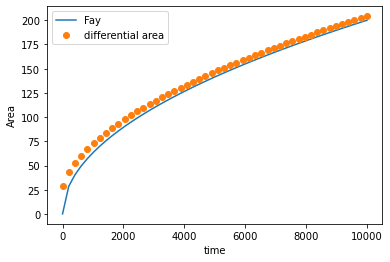

In [12]:
# differential equation in terms of Area

# initilize from Fay time dependent:
start = 10

def dadt(a):
    return 0.5 * C**2  / a

A3 = Euler(dadt, T[:], A1[1])

## simple Euler method:
#A3 = np.zeros_like(T)
## small initial value to kick it off
#A3[:start] = A1[:start]
#dt = T[1] - T[0] # assume it's the same...
#for i, t in enumerate(T[start:]):
#    i += start
#    A3[i] = A3[i-1] + dadt(A3[i-1])*dt
    
fig, ax = plt.subplots()
ax.plot(T, A1, label="Fay")
ax.plot(T, A3, 'o', label="differential area")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Area")

Solution exactly the same also -- with small enough time steps and the right initiliation.

## Compute with some real numbers:

$ C = \pi \cdot k_{\nu}  ( \frac{\Delta \rho \cdot g \cdot V^2}{\nu_w^{1/2}})$


In [13]:
# Some values to play with:
# Alaska North Slope Crude: middle pipeline
rho_oil = 876 # kg/m^3 density of oil
visc_oil = 3.834e-05 # m^2/s kinematic viscosity
vol = 795 # initial volume (m^3 -- 5000bbl)

#NOTE: why is this K2**2 ?????
C = np.pi * K2**2 * ( Delta(rho_oil) * g * vol**2 / np.sqrt(visc_w) )**(1.0/3)
print("C = ", C)


C =  4442.391161573673


timestep: 110.76923076923076 minutes


Text(0, 0.5, 'Area')

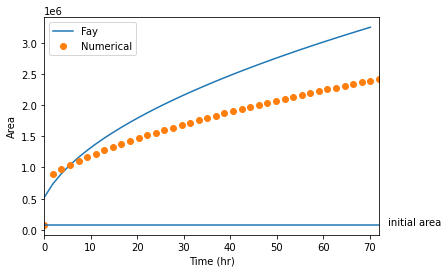

In [14]:
# differential equation in terms of Area

# Time zero to 72 hrs
T = np.linspace(0, 72*3600, 40)

print("timestep:", (T[1] - T[0]) / 60, "minutes")

#Fay_area = C * np.sqrt(T) # straight Fay Gravity-viscous
Fay_area = Fay_gv(vol, rho_oil, T)


A_0 = init_area(vol, rho_oil)

A_max = max_area(vol, visc_oil)

# initilize from Fay time dependent:
start = 2

def dadt(a):
    return 0.5 * C**2  / a

# simple Euler method:
A = np.zeros_like(T)
# small initial value to kick it off
#A[:start] = Fay_area[:start]
# start with initial-area
start = 1
A[0] = A_0
dt = T[1] - T[0] # assume it's the same...
for i, t in enumerate(T[start:]):
    i += start
    A[i] = A[i-1] + dadt(A[i-1])*dt

Thr = T / 3600
fig, ax = plt.subplots()
ax.plot(Thr[:-1], Fay_area[1:], label="Fay") # adjusted for initial area (approx)
ax.plot(Thr, A, 'o',label="Numerical")
ax.legend(loc='upper left')

ax.set_xlim(Thr[0], Thr[-1])

ax.hlines(A_0, Thr[0], Thr[-1])
ax.text(Thr[-1]+2, A_0, "initial area")

#ax.hlines(A_max, Thr[0], Thr[-1])
#ax.text(Thr[-1]+2, A_max, "maximum area")


ax.set_xlabel("Time (hr)")
ax.set_ylabel("Area")

**NOTE:** The numerical solution closely matches the analytic solution with a time step of about 2 hours. Indicating that the Euler method is accurate enough for timesteps on order of an hour or less.

The numerical solution starts with the initial area from Fay Gravity-inertial, and the analytical Fay gravity-viscous solution has been offset to approximate the same starting value.

In [15]:
print("total volume:", A_max * min_thickness(visc_oil))

total volume: 795.0000000000001


## Add the diffusion

Diffusion is a big player in spreading -- dominating after the first day or so.

As the initial spread, and Fay gravity-viscous, and diffusion are all going on at once, the diffusive spread has been re-cast as a differential equaiton in area -- llke the Fay g-v solution:



### Elliot Diffusion:

$ D = 0.033 t^{0.16} $


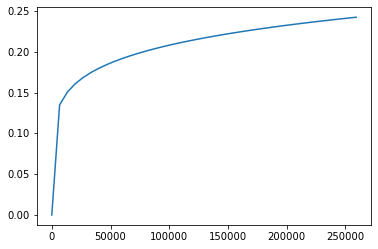

In [16]:
D = 0.033 * T**0.16

fig, ax = plt.subplots()
ax.plot(T, D)

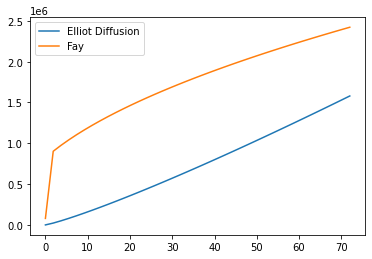

In [17]:
# Area as a function of time
A_elliot = np.pi * 4 *0.066 * T**(1.16)

fig, ax = plt.subplots()
ax.plot(Thr, A_elliot, label="Elliot Diffusion")
ax.plot(Thr, A, label="Fay")
ax.legend(loc="upper left")


## Okubo: constant for Richardson spreading

### (to be completed later -- maybe)

Okubu (1971) is the key paper for asertign and getting constants for Richardson's 4/3 diffusion.

However, while it has a line-fit, they don't seem to have published the constant. So this is a little code to try to match the figure.

# Example release

10 m^3 over 10 hrs

100 LEs

1 hr timestep



In [30]:
# Some values to play with:
# Alaska North Slope Crude: middle pipeline
rho_oil = 876 # kg/m^3 density of oil
visc_oil = 3.834e-05 # m^2/s kinematic viscosity

total_vol = 10. # m^3
release_time = 10 * 3600  # 10 hrs in sec.
release_rate = total_vol / release_time

num_LE = 100
time_step = 3600. # 1 hr is seconds

# "blob" is the amount released in 15 min, to scale the spreading
V_blob = release_rate * 15 * 60  # 15 min in seconds

print(f"Blog volume: {V_blob} m^3")

A_0 = init_area2(V_blob, rho_oil)

print(f"initial area: {A_0}")

A0_i = A_0 / num_LE

print(f"area per LE: {A0_i}")


Blog volume: 0.25 m^3
initial area: 96.12821578474393
area per LE: 0.9612821578474393


C =  4442.391161573673


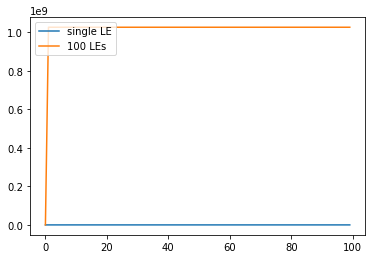

In [44]:
# compute spread over time

C = np.pi * K2**2 * ( Delta(rho_oil) * g * vol**2 / np.sqrt(visc_w) )**(1.0/3)
print("C = ", C)

def dadt(a):
    return 0.5 * C**2  / a

dt = time_step / 3600

N = 100
t = np.zeros(N)
A_tot = np.zeros(N)
A_tot[0] = A_0
A_LE = np.zeros(N)
A_LE[0] = A0_i

for i in range(1, N):
    t[i] = t[i-1] + dt
    A_tot[i] = (A_tot[i-1] + dadt(A_tot[i-1]) * dt)
    A_LE[i] = (A_LE[i-1] + dadt(A_LE[i-1]) * dt)

    
fig, ax = plt.subplots()
ax.plot(t, A_tot, label="single LE")
ax.plot(t, A_LE * num_LE, label="100 LEs")
ax.legend(loc="upper left")

In [45]:
print(A_LE)
print(A_tot)


[9.61282158e-01 1.02648535e+07 1.02648545e+07 1.02648554e+07
 1.02648564e+07 1.02648574e+07 1.02648583e+07 1.02648593e+07
 1.02648602e+07 1.02648612e+07 1.02648622e+07 1.02648631e+07
 1.02648641e+07 1.02648651e+07 1.02648660e+07 1.02648670e+07
 1.02648679e+07 1.02648689e+07 1.02648699e+07 1.02648708e+07
 1.02648718e+07 1.02648727e+07 1.02648737e+07 1.02648747e+07
 1.02648756e+07 1.02648766e+07 1.02648776e+07 1.02648785e+07
 1.02648795e+07 1.02648804e+07 1.02648814e+07 1.02648824e+07
 1.02648833e+07 1.02648843e+07 1.02648852e+07 1.02648862e+07
 1.02648872e+07 1.02648881e+07 1.02648891e+07 1.02648900e+07
 1.02648910e+07 1.02648920e+07 1.02648929e+07 1.02648939e+07
 1.02648949e+07 1.02648958e+07 1.02648968e+07 1.02648977e+07
 1.02648987e+07 1.02648997e+07 1.02649006e+07 1.02649016e+07
 1.02649025e+07 1.02649035e+07 1.02649045e+07 1.02649054e+07
 1.02649064e+07 1.02649074e+07 1.02649083e+07 1.02649093e+07
 1.02649102e+07 1.02649112e+07 1.02649122e+07 1.02649131e+07
 1.02649141e+07 1.026491

In [46]:
dt


1.0